# Svedrup balance

The Svedrup balance can be derived from the linearized momentum equation to give:

\begin{align}
-fv &= -\frac{\p \phi}{\p x} + \frac{1}{\rho_0} \frac{\p \tau^x}{\p z} \\
+fu &= -\frac{\p \phi}{\p y} + \frac{1}{\rho_0} \frac{\p \tau^y}{\p z} \\
\end{align}

In the above expression we include the shear stress tangential to $x$ and $y$ directions, along with the usual geostophic balance.

Taking the curl of the above equations, and imposing zero-divergence criterion, we obtain:

$$ \beta v = f \frac{\p w}{\p z} + \frac{1}{\rho_0}  \frac{\p}{\p z} curl(\tau) $$

where $\beta := \frac{\p f}{\p y}$. Upon integrating this expression over height, and impossing the boundary conditions for the vertical velocity $w$ we arrive at the Svedrup balance:

$$ V_s = \int_{-H}^0 v dz =  \frac{\p \psi_s}{\p x}=  \frac{1}{\beta \rho_0} curl (\tau_w)$$

where $H$ is the height of the ocean, $\psi_x$ is the stream function and $\tau_w$ is the wind shear stress.

In [1]:
%matplotlib inline
from sympy.abc import f, u, v, x, y, z, L, beta, rho
from sympy import *

x, y = symbols("x/L, y/L", real=True)
plt.style.use("ggplot")

Ly = 1
tau_wind = -cos(2*pi*y / Ly)

init_printing(latex_mode="equation")

## Given input

Normalized wind shear stress ${\tau_w} / {\tau_0}$

In [2]:
tau_wind

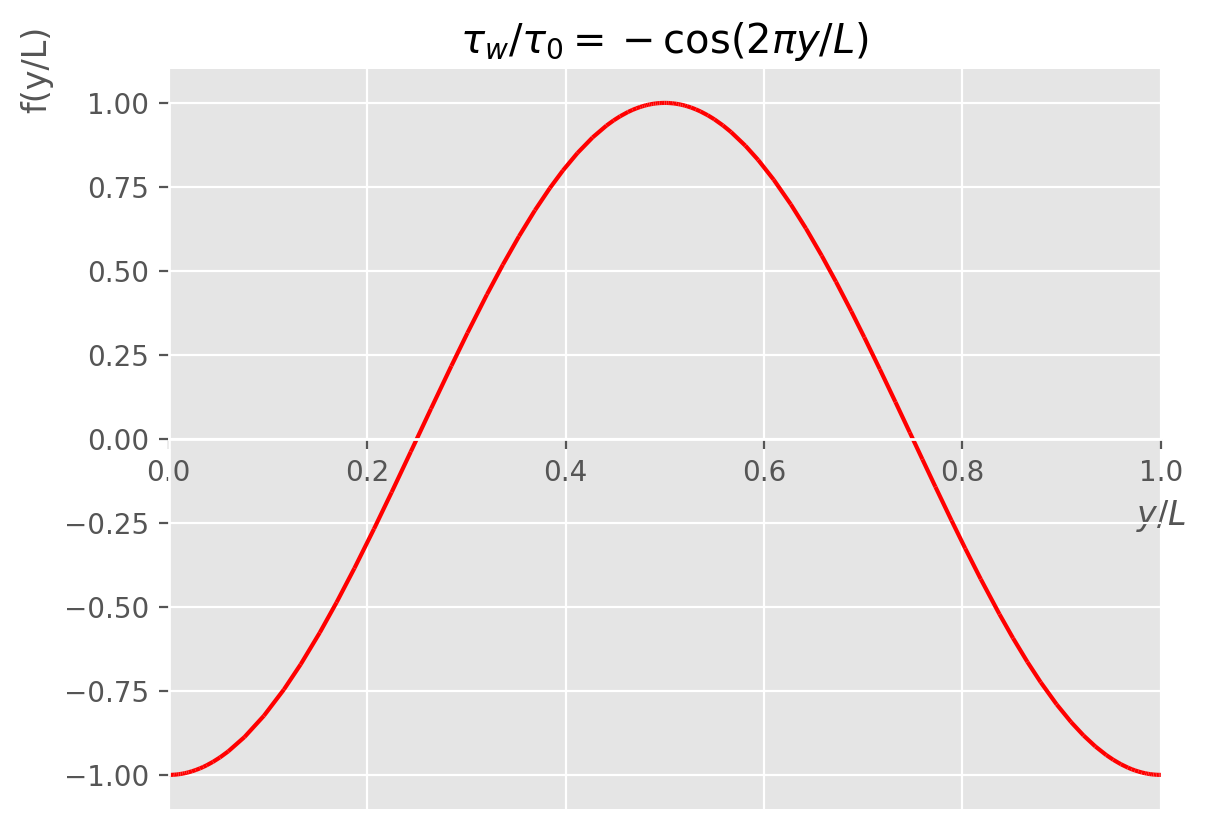

In [3]:
from sympy.plotting import plot
import matplotlib.pyplot as plt

limits = (y, 0, Ly)
p = plot(
    tau_wind,
    limits,
    line_color="r",
    xlabel=f"${y}$",
    title=r"$\tau_w / \tau_0 = {}$".format(latex(tau_wind))
)

Curl of the the shear stress:

In [4]:
curl_tau_wind = -tau_wind.diff(y)

p = plot(
    curl_tau_wind,
    limits,
    line_color="r",
    xlabel=f"${y}$",
    title=r"$curl(\tau_w / \tau_0) = {}$".format(latex(curl_tau_wind / L))
)

## Streamlines

We can compute an expression for the resulting streamfunction by integrating the velocity:

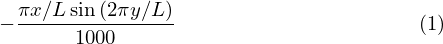

In [5]:
rho = 1000
a = 6400e3
beta = 2#  * pi * cos(y) / a
psi = curl_tau_wind.integrate(x) / (beta * rho)
psi

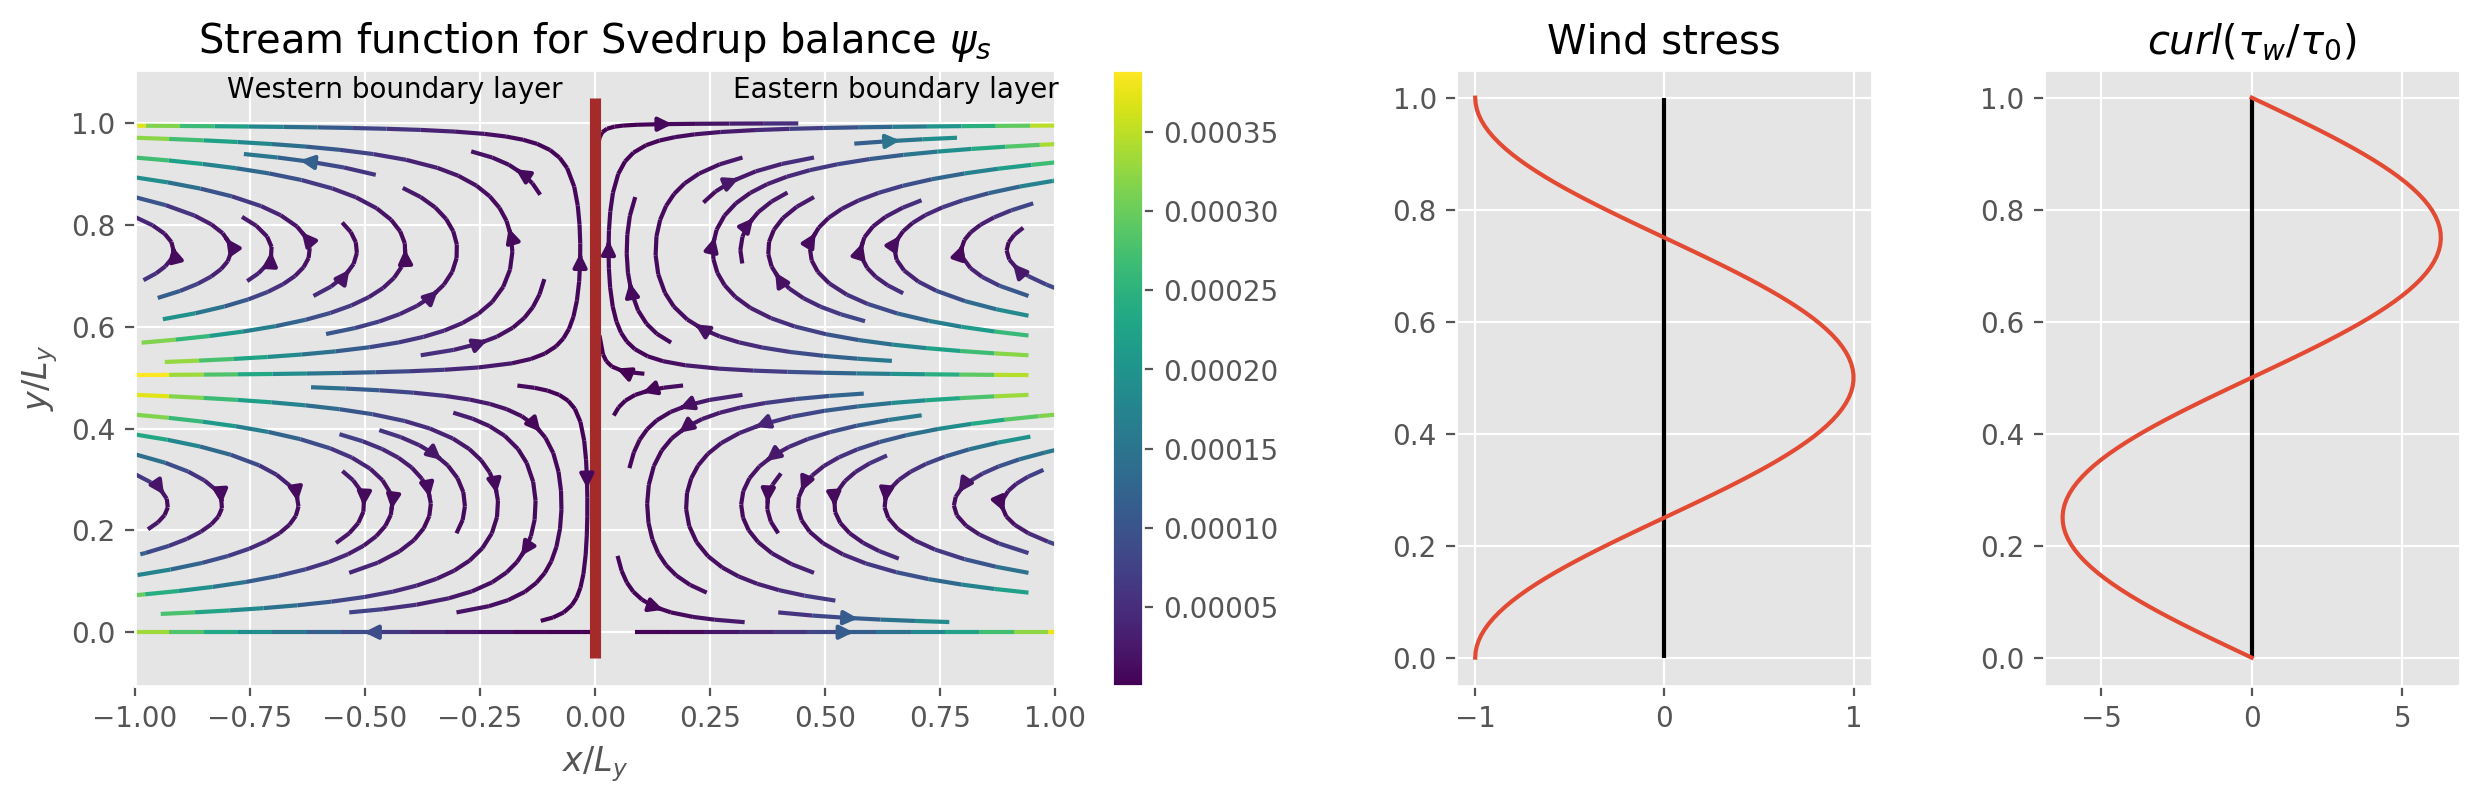

In [6]:
import numpy as np

def velocity_field(psi, x, y):
    u = lambdify((x, y), -psi.diff(y), 'numpy')
    v = lambdify((x, y), psi.diff(x), 'numpy')
    return u, v

def plot_streamlines(ax, u, v, xlim=(-1,1), ylim=(0, 1)):
    X = np.linspace(*xlim, 100)
    Y = np.linspace(*ylim, 100)
    XX, YY = np.meshgrid(X, Y)
    U = u(XX, YY)
    V = v(XX, YY)
    return ax.streamplot(X, Y, U, V, density=0.9, color=(U**2+ V**2))

def plot1d(y, expr, ax, title):
    f = lambdify(y, expr, 'numpy')
    Y = np.linspace(0, 1, 100)
    ax.plot(f(Y), Y)
    ax.vlines(0, 0, 1)
    ax.set_title(title)

# fig, axes = plt.subplots(1, 2, sharey=True,)
# ax, axt = axes.ravel()

fig = plt.figure(figsize=(15,4))
grid = plt.GridSpec(1, 16, figure=fig)
ax = plt.subplot(grid[0, 0:8])
ax_tau = plt.subplot(grid[0, 9:12])
ax_curl_tau = plt.subplot(grid[0, 13:16])

stream = plot_streamlines(ax, *velocity_field(psi, x, y))
fig.colorbar(stream.lines, ax=ax)

ax.set_xlabel("$x / L_y$")
ax.set_ylabel("$y / L_y$")
ax.set_title("Stream function for Svedrup balance $\psi_s$")
ax.vlines(0, -0.05, 1.05, colors="brown", linewidth=4)
ax.annotate("Eastern boundary layer", (0.3, 1.05))
ax.annotate("Western boundary layer", (-0.8, 1.05))

plot1d(y, tau_wind, ax_tau, "Wind stress")
plot1d(y, curl_tau_wind, ax_curl_tau, r"$curl(\tau_w / \tau_0)$")

## Balance in the western boundary: Stommel's model

The balance in the western boundary layer was explained by Stommel's model which introduced **bottom friction** ($r \nabla^2 \psi_s$) in addition to the Svedrup balance.

$$ \beta \frac{\p \psi_s}{\p x} + r \nabla^2 \psi_s=  \frac{1}{\rho_0} curl (\tau_w)$$

where $r$ is a friction parameter. Since $r$ is typically small, Stommel's model would yield Svedrup balance in the ocean interiors. However when the bottom friction dominate, i.e. along the boundary, we get

$$ \beta \frac{\p \psi_s}{\p x} + r \nabla^2 \psi_s \approx 0 $$

Which results in a streamfunction which exponentially decays as:

$$ \psi_s^{west} \sim \exp  (-\frac{\beta}{r}x)$$

From Vallis such a distribution of the wind shear stress would result in a two-gyre solution which looks like:

![](svedrup_gyre.png)

> Fig. 19.6 Two solutions of the Stommel model ... and the lower panel shows a two-gyre solution, with wind stress proportional to cos (2πy/a). In both cases εS = 0.04.